In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mut_data = pd.read_csv('../data/mutation_scores.csv')
mut_data.head()

,Mutation,Count,RC Index,Position,Effect
0,T791C,316,0.048929,791,lethal
1,G793A,415,0.041914,793,lethal
2,G802C,34,0.170533,802,attenuated
3,T805G,46,0.042015,805,lethal
4,T805A,294,0.032869,805,lethal


In [3]:
def rc_scores(start, width=20):
    
    mask = (mut_data['Position'] <= (start+width)) & (mut_data['Position'] >= (start-width))
    mean_rc = mut_data.loc[mask, 'RC Index'].mean()
    
    return mean_rc

def lethal_count(start, width=20):
    
    mask = (mut_data['Position'] <= (start+width)) & (mut_data['Position'] >= (start-width))
    num_lethal = (mut_data.loc[mask, 'Effect'] == "lethal").sum()
    
    return num_lethal

In [4]:
mean_scores = pd.Series([rc_scores(n) for n in range(9717)])

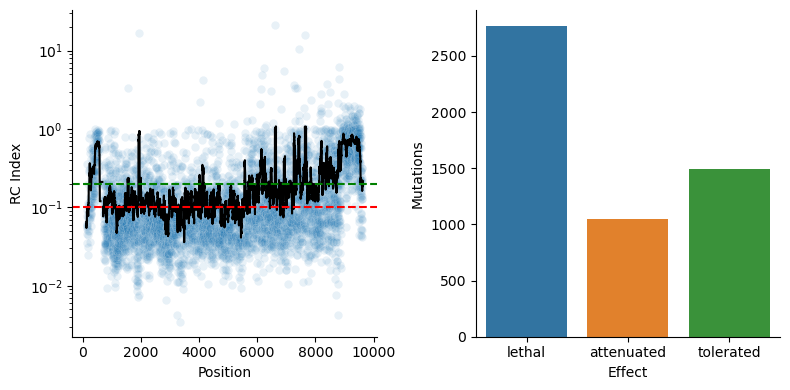

In [7]:
fig, (pos_ax, count_ax) = plt.subplots(1,2, figsize=(8,4))


sns.scatterplot(data = mut_data,
                x = 'Position', 
                y = 'RC Index', 
                ax=pos_ax, alpha=0.1)
pos_ax.plot(mean_scores, color = 'k')
pos_ax.axhline(0.1, linestyle = '--', color = 'r')
pos_ax.axhline(0.2, linestyle = '--', color = 'g')
pos_ax.set_yscale('log')
sns.despine(ax=pos_ax)


sns.countplot(data = mut_data,
              x = 'Effect', 
              ax=count_ax)
count_ax.set_ylabel('Mutations')
sns.despine(ax=count_ax)

fig.tight_layout()
fig.savefig('../results/figures/mutation_scoring.png', dpi=300)

In [ ]:
mut_data['Effect'].value_counts()